In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [20]:
train_fname = '../data/train.csv'
test_fname = '../data/test.csv'
df = pd.read_csv(train_fname, sep=';')
df_test = pd.read_csv(test_fname, sep=';')
f_con = ['APP_NB','APP_NB_PAYS','APP_NB_TYPE','NB_CLASSES','NB_ROOT_CLASSES','NB_SECTORS','NB_FIELDS','INV_NB',
        'INV_NB_PAYS','INV_NB_TYPE','cited_n','cited_age_min','cited_age_median','cited_age_max','cited_age_mean',
        'cited_age_std','NB_BACKWARD_NPL','NB_BACKWARD_XY','NB_BACKWARD_I','NB_BACKWARD_AUTRE','NB_BACKWARD_PL',
        'NB_BACKWARD','pct_NB_IPC','pct_NB_IPC_LY','oecd_NB_ROOT_CLASSES','oecd_NB_BACKWARD_PL','oecd_NB_BACKWARD_NPL',
        'IDX_ORIGIN','IDX_RADIC']
(n_samples,n_variables) = (df.shape[0],len(f_con))
df = df.reindex(np.random.permutation(df.index));

In [21]:
X_train = df[f_con].values
X_test = df_test[f_con].values
imputer = Imputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
X = np.concatenate((X_train,X_test), axis = 0)

In [25]:
scale(X, copy=False)
XTX = np.dot(np.transpose(X),X)
E = np.linalg.eigvalsh(XTX)

[ -1.44117360e-09   5.91705551e-10   3.25306949e+01   1.51543922e+03
   3.68352810e+03   2.75018834e+04   5.57353420e+04   7.67302145e+04
   9.58644408e+04   1.54366987e+05   1.73218929e+05   1.75833751e+05
   2.19541667e+05   2.66332221e+05   2.71127714e+05   2.94138300e+05
   3.19448492e+05   3.36179502e+05   3.42849921e+05   3.85928181e+05
   3.99355761e+05   4.09283547e+05   4.63218151e+05   4.75614322e+05
   5.32426815e+05   6.45189002e+05   1.04116429e+06   1.41883324e+06
   2.70011983e+06]


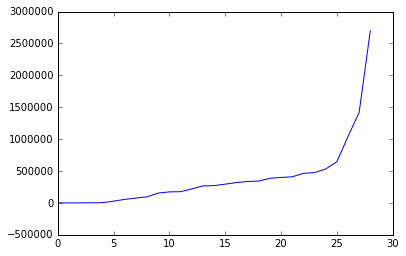

In [28]:
l,r = 0,n_variables
plt.plot(range(l,r),[E[i] for i in range(l,r)])
print(E)

### On voit un beau coude, on a envie de garder les quatre composantes les plus importantes... Ce serait intéressant pour faire par exemple de la régression logistique polynomiale.
## Cette conclusion sera réutilisée ailleurs.